In [20]:
import xarray
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
feature_fn = '/beegfs/DATA/pritchard/srasp/preprcessed_data/full_physics_essentials_train_test_features.nc'
target_fn = '/beegfs/DATA/pritchard/srasp/preprcessed_data/full_physics_essentials_train_test_targets.nc'
norm_fn = '/beegfs/DATA/pritchard/srasp/preprcessed_data/full_physics_essentials_train_test_norm.nc'

In [3]:
aqua_fn = '/beegfs/DATA/pritchard/srasp/Aquaplanet_enhance05/AndKua_aqua_SPCAM3.0_enhance05.cam2.h1.0000-01-01-00000.nc'

In [4]:
features = nc.Dataset(feature_fn)
norm = nc.Dataset(norm_fn)

In [5]:
features

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    log: 
    Time: 2018-02-13T14:36:19

    Executed command:

    python preprocess_aqua.py --config_file ../config/full_physics_essentials.yml --in_dir /beegfs/DATA/pritchard/srasp/Aquaplanet_enhance05/ --aqua_names AndKua_aqua_SPCAM3.0_enhance05.cam2.h1.0000-01-0* --out_dir /beegfs/DATA/pritchard/srasp/preprcessed_data/ --out_pref full_physics_essentials_train_test

    In directory: /export/home/srasp/repositories/CBRAIN-CAM/data_processing

    Git hash: e37afd569c517f1350243b0f224d5489b55b4ce1

        
    dimensions(sizes): feature_lev(92), sample(3530752), string9(9)
    variables(dimensions): float32 features(sample,feature_lev), int32 time(sample), float64 lat(sample), float64 lon(sample), |S1 feature_names(feature_lev,string9), int32 feature_lev(feature_lev)
    groups: 

In [6]:
norm

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    log: 
    Time: 2018-02-13T14:36:19

    Executed command:

    python preprocess_aqua.py --config_file ../config/full_physics_essentials.yml --in_dir /beegfs/DATA/pritchard/srasp/Aquaplanet_enhance05/ --aqua_names AndKua_aqua_SPCAM3.0_enhance05.cam2.h1.0000-01-0* --out_dir /beegfs/DATA/pritchard/srasp/preprcessed_data/ --out_pref full_physics_essentials_train_test

    In directory: /export/home/srasp/repositories/CBRAIN-CAM/data_processing

    Git hash: e37afd569c517f1350243b0f224d5489b55b4ce1

        
    dimensions(sizes): feature_lev(92), target_lev(60), string9(9), string14(14)
    variables(dimensions): |S1 feature_names(feature_lev,string9), int32 feature_lev(feature_lev), float32 feature_means(feature_lev), float32 feature_stds(feature_lev), |S1 target_names(target_lev,string14), int32 target_lev(target_lev), float32 target_means(target_lev), float32 target_stds(target_l

In [8]:
features['feature_names'][:]

array(['TBP_lev00', 'TBP_lev01', 'TBP_lev02', 'TBP_lev03', 'TBP_lev04',
       'TBP_lev05', 'TBP_lev06', 'TBP_lev07', 'TBP_lev08', 'TBP_lev09',
       'TBP_lev10', 'TBP_lev11', 'TBP_lev12', 'TBP_lev13', 'TBP_lev14',
       'TBP_lev15', 'TBP_lev16', 'TBP_lev17', 'TBP_lev18', 'TBP_lev19',
       'TBP_lev20', 'TBP_lev21', 'TBP_lev22', 'TBP_lev23', 'TBP_lev24',
       'TBP_lev25', 'TBP_lev26', 'TBP_lev27', 'TBP_lev28', 'TBP_lev29',
       'QBP_lev00', 'QBP_lev01', 'QBP_lev02', 'QBP_lev03', 'QBP_lev04',
       'QBP_lev05', 'QBP_lev06', 'QBP_lev07', 'QBP_lev08', 'QBP_lev09',
       'QBP_lev10', 'QBP_lev11', 'QBP_lev12', 'QBP_lev13', 'QBP_lev14',
       'QBP_lev15', 'QBP_lev16', 'QBP_lev17', 'QBP_lev18', 'QBP_lev19',
       'QBP_lev20', 'QBP_lev21', 'QBP_lev22', 'QBP_lev23', 'QBP_lev24',
       'QBP_lev25', 'QBP_lev26', 'QBP_lev27', 'QBP_lev28', 'QBP_lev29',
       'VBP_lev00', 'VBP_lev01', 'VBP_lev02', 'VBP_lev03', 'VBP_lev04',
       'VBP_lev05', 'VBP_lev06', 'VBP_lev07', 'VBP_lev08', 'VBP_

In [24]:
unnorm_features = features['features'][:] * norm['feature_stds'][:] + norm['feature_means'][:]

In [10]:
unnorm_features.shape

(3530752, 92)

In [12]:
aqua = nc.Dataset(aqua_fn); aqua

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    source: CAM
    case: AndKua_aqua_SPCAM3.0_enhance05
    title: 
    logname: tg847872
    host: 
    Version: $Name:  $
    revision_Id: $Id: history.F90,v 1.26.2.38 2003/12/15 18:52:35 hender Exp $
    dimensions(sizes): lat(64), lon(128), lev(30), ilev(31), isccp_prs(7), isccp_tau(7), isccp_prstau(49), time(48), tbnd(2), chars(8), crm_x(8), crm_y(1), crm_z(28)
    variables(dimensions): float64 P0(), float64 lat(lat), float64 lon(lon), float64 crm_x(crm_x), float64 crm_y(crm_y), float64 crm_z(crm_z), float64 lev(lev), float64 ilev(ilev), float64 isccp_prs(isccp_prs), float64 isccp_tau(isccp_ta), float64 isccp_prstau(isccp_prsta), float64 time(time), float64 time_bnds(time,tbnd), |S1 date_written(time,chars), |S1 time_written(time,chars), int32 ntrm(), int32 ntrn(), int32 ntrk(), int32 ndbase(), int32 nsbase(), int32 nbdate(), int32 nbsec(), int32 mdt(), int32 

In [25]:
# sample, lev --> [time, lat, lon]
unnorm_features = unnorm_features.reshape(-1, 64, 128, 92)

In [14]:
ctrl_TBP = aqua['TAP'][:] - aqua['TPHYSTND'][:] * 1800.

In [15]:
ctrl_TBP.shape

(48, 30, 64, 128)

In [16]:
ctrl_TBP = ctrl_TBP[1:]

In [26]:
unnorm_features.shape

(431, 64, 128, 92)

In [27]:
unnorm_features[0, 0, 0, :5]

array([ 246.51036072,  231.88568115,  216.40667725,  238.90396118,
        231.94915771], dtype=float32)

In [19]:
ctrl_TBP[0, :5, 0, 0]

array([ 246.51036072,  231.88568115,  216.40667725,  238.90396118,
        231.94915771], dtype=float32)

Check! Computed BPs correctly

In [30]:
unnorm_features[0, 0, 0, -1]   # SOLIN

483.36731

In [32]:
aqua['SOLIN'][1, 0, 0]

483.36731

In [34]:
unnorm_features[0, 0, 0, -2]   # PS

99704.258

In [35]:
aqua['PS'][0, 0, 0]

99704.258

Check! Took the correct time steps for PS

In [37]:
norm['target_names'][:]

array(['TPHYSTND_lev00', 'TPHYSTND_lev01', 'TPHYSTND_lev02',
       'TPHYSTND_lev03', 'TPHYSTND_lev04', 'TPHYSTND_lev05',
       'TPHYSTND_lev06', 'TPHYSTND_lev07', 'TPHYSTND_lev08',
       'TPHYSTND_lev09', 'TPHYSTND_lev10', 'TPHYSTND_lev11',
       'TPHYSTND_lev12', 'TPHYSTND_lev13', 'TPHYSTND_lev14',
       'TPHYSTND_lev15', 'TPHYSTND_lev16', 'TPHYSTND_lev17',
       'TPHYSTND_lev18', 'TPHYSTND_lev19', 'TPHYSTND_lev20',
       'TPHYSTND_lev21', 'TPHYSTND_lev22', 'TPHYSTND_lev23',
       'TPHYSTND_lev24', 'TPHYSTND_lev25', 'TPHYSTND_lev26',
       'TPHYSTND_lev27', 'TPHYSTND_lev28', 'TPHYSTND_lev29', 'PHQ_lev00',
       'PHQ_lev01', 'PHQ_lev02', 'PHQ_lev03', 'PHQ_lev04', 'PHQ_lev05',
       'PHQ_lev06', 'PHQ_lev07', 'PHQ_lev08', 'PHQ_lev09', 'PHQ_lev10',
       'PHQ_lev11', 'PHQ_lev12', 'PHQ_lev13', 'PHQ_lev14', 'PHQ_lev15',
       'PHQ_lev16', 'PHQ_lev17', 'PHQ_lev18', 'PHQ_lev19', 'PHQ_lev20',
       'PHQ_lev21', 'PHQ_lev22', 'PHQ_lev23', 'PHQ_lev24', 'PHQ_lev25',
       'PHQ_lev26

Now check the targets.

In [42]:
targets = nc.Dataset(target_fn); targets

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    log: 
    Time: 2018-02-13T15:04:37

    Executed command:

    python preprocess_aqua.py --config_file ../config/full_physics_essentials.yml --in_dir /beegfs/DATA/pritchard/srasp/Aquaplanet_enhance05/ --aqua_names AndKua_aqua_SPCAM3.0_enhance05.cam2.h1.0000-01-0* --out_dir /beegfs/DATA/pritchard/srasp/preprcessed_data/ --out_pref full_physics_essentials_train_test

    In directory: /export/home/srasp/repositories/CBRAIN-CAM/data_processing

    Git hash: e37afd569c517f1350243b0f224d5489b55b4ce1

        
    dimensions(sizes): target_lev(60), sample(3530752)
    variables(dimensions): int64 target_lev(target_lev), int64 time(sample), float64 lat(sample), float64 lon(sample), float32 targets(sample,target_lev), <class 'str'> target_names(target_lev)
    groups: 

In [43]:
targets['target_names'][:]

array(['TPHYSTND_lev00', 'TPHYSTND_lev01', 'TPHYSTND_lev02',
       'TPHYSTND_lev03', 'TPHYSTND_lev04', 'TPHYSTND_lev05',
       'TPHYSTND_lev06', 'TPHYSTND_lev07', 'TPHYSTND_lev08',
       'TPHYSTND_lev09', 'TPHYSTND_lev10', 'TPHYSTND_lev11',
       'TPHYSTND_lev12', 'TPHYSTND_lev13', 'TPHYSTND_lev14',
       'TPHYSTND_lev15', 'TPHYSTND_lev16', 'TPHYSTND_lev17',
       'TPHYSTND_lev18', 'TPHYSTND_lev19', 'TPHYSTND_lev20',
       'TPHYSTND_lev21', 'TPHYSTND_lev22', 'TPHYSTND_lev23',
       'TPHYSTND_lev24', 'TPHYSTND_lev25', 'TPHYSTND_lev26',
       'TPHYSTND_lev27', 'TPHYSTND_lev28', 'TPHYSTND_lev29', 'PHQ_lev00',
       'PHQ_lev01', 'PHQ_lev02', 'PHQ_lev03', 'PHQ_lev04', 'PHQ_lev05',
       'PHQ_lev06', 'PHQ_lev07', 'PHQ_lev08', 'PHQ_lev09', 'PHQ_lev10',
       'PHQ_lev11', 'PHQ_lev12', 'PHQ_lev13', 'PHQ_lev14', 'PHQ_lev15',
       'PHQ_lev16', 'PHQ_lev17', 'PHQ_lev18', 'PHQ_lev19', 'PHQ_lev20',
       'PHQ_lev21', 'PHQ_lev22', 'PHQ_lev23', 'PHQ_lev24', 'PHQ_lev25',
       'PHQ_lev26

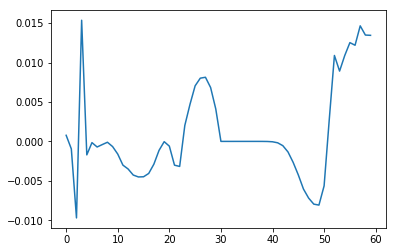

In [44]:
plt.plot(np.mean(targets['targets'][:], axis=0))

Now check the pure crm inputs file

In [45]:
feature_fn2 = '/beegfs/DATA/pritchard/srasp/preprcessed_data/full_physics_essentials_train_test2_features.nc'
target_fn2 = '/beegfs/DATA/pritchard/srasp/preprcessed_data/full_physics_essentials_train_test2_targets.nc'
norm_fn2 = '/beegfs/DATA/pritchard/srasp/preprcessed_data/full_physics_essentials_train_test2_norm.nc'

In [46]:
features2 = nc.Dataset(feature_fn2)
norm2 = nc.Dataset(norm_fn2)

In [47]:
features2['feature_names'][:]

array(['T_C_lev00', 'T_C_lev01', 'T_C_lev02', 'T_C_lev03', 'T_C_lev04',
       'T_C_lev05', 'T_C_lev06', 'T_C_lev07', 'T_C_lev08', 'T_C_lev09',
       'T_C_lev10', 'T_C_lev11', 'T_C_lev12', 'T_C_lev13', 'T_C_lev14',
       'T_C_lev15', 'T_C_lev16', 'T_C_lev17', 'T_C_lev18', 'T_C_lev19',
       'T_C_lev20', 'T_C_lev21', 'T_C_lev22', 'T_C_lev23', 'T_C_lev24',
       'T_C_lev25', 'T_C_lev26', 'T_C_lev27', 'T_C_lev28', 'T_C_lev29',
       'Q_C_lev00', 'Q_C_lev01', 'Q_C_lev02', 'Q_C_lev03', 'Q_C_lev04',
       'Q_C_lev05', 'Q_C_lev06', 'Q_C_lev07', 'Q_C_lev08', 'Q_C_lev09',
       'Q_C_lev10', 'Q_C_lev11', 'Q_C_lev12', 'Q_C_lev13', 'Q_C_lev14',
       'Q_C_lev15', 'Q_C_lev16', 'Q_C_lev17', 'Q_C_lev18', 'Q_C_lev19',
       'Q_C_lev20', 'Q_C_lev21', 'Q_C_lev22', 'Q_C_lev23', 'Q_C_lev24',
       'Q_C_lev25', 'Q_C_lev26', 'Q_C_lev27', 'Q_C_lev28', 'Q_C_lev29',
       'V_C_lev00', 'V_C_lev01', 'V_C_lev02', 'V_C_lev03', 'V_C_lev04',
       'V_C_lev05', 'V_C_lev06', 'V_C_lev07', 'V_C_lev08', 'V_C_

In [48]:
unnorm_features2 = features2['features'][:] * norm2['feature_stds'][:] + norm2['feature_means'][:]

In [49]:
unnorm_features2.shape

(3530752, 152)

In [51]:
# sample, lev --> [time, lat, lon]
unnorm_features2 = unnorm_features2.reshape(-1, 64, 128, 152)

In [52]:
# T_C = TAP[t-1] - DTV[t-1] * dt
ctrl_T_C = aqua['TAP'][:-1] - aqua['DTV'][:-1] * 1800.

In [53]:
unnorm_features2[0, 0, 0, :5]

array([ 246.5181427 ,  231.8901825 ,  216.40246582,  238.91215515,
        231.94445801], dtype=float32)

In [54]:
ctrl_T_C[0, :5, 0, 0]

array([ 246.5181427 ,  231.8901825 ,  216.40246582,  238.91215515,
        231.94445801], dtype=float32)

In [55]:
# adiab = (TBP - TC)/dt
ctrl_T_C.shape, ctrl_TBP.shape

((47, 30, 64, 128), (47, 30, 64, 128))

In [56]:
ctrl_adiab = (ctrl_TBP - ctrl_T_C) / 1800.

In [65]:
features2['feature_names'][90]

'dTdt_adiabatic_lev00'

In [66]:
unnorm_features2[0, 0, 0, 90:95]

array([ -4.32332354e-06,  -2.50074595e-06,   2.33968103e-06,
        -4.55220561e-06,   2.61094829e-06], dtype=float32)

In [67]:
ctrl_adiab[0, :4, 0, 0]

array([ -4.32332354e-06,  -2.50074595e-06,   2.33968103e-06,
        -4.55220561e-06], dtype=float32)

Check, I think I did everything correct